In [3]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [4]:
npCust= np.loadtxt('asset/customersData.csv', delimiter=",", skiprows=1, 
                  usecols=[2,3],dtype = float)

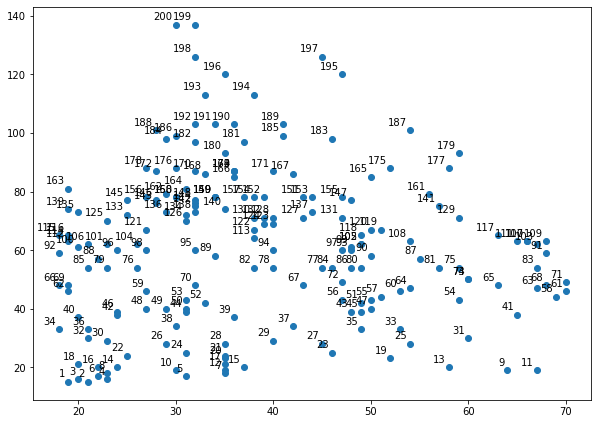

In [5]:
labels = range(1, npCust.shape[0]+1)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(npCust[:,0],npCust[:,1], label='True Position')

for label, x, y in zip(labels, npCust[:, 0], npCust[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

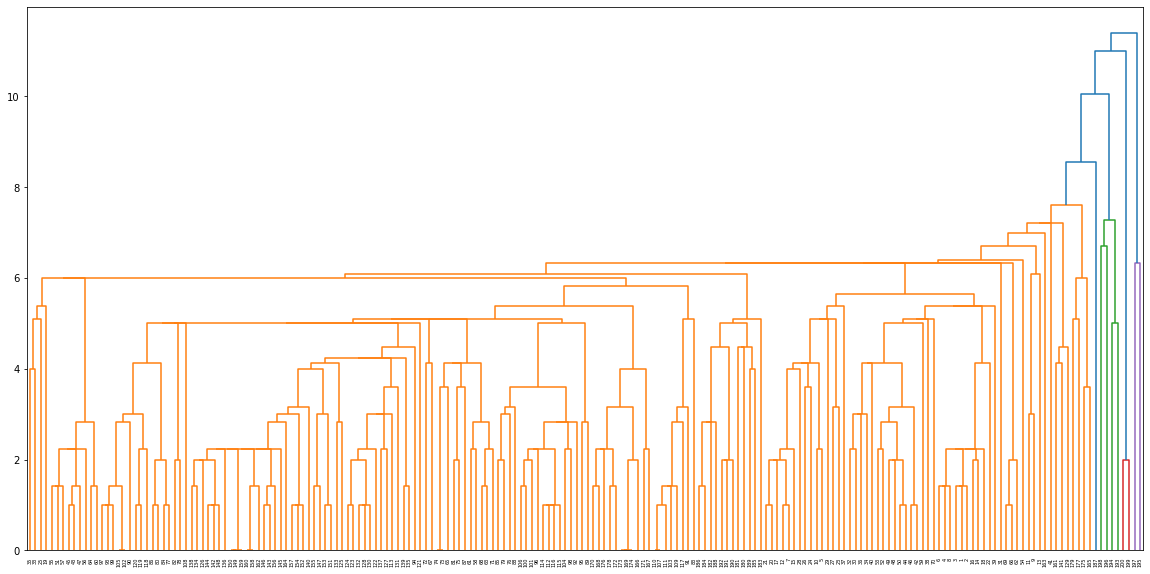

In [6]:
linked = linkage(npCust, 'single')

labelList = range(1, npCust.shape[0]+1)

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

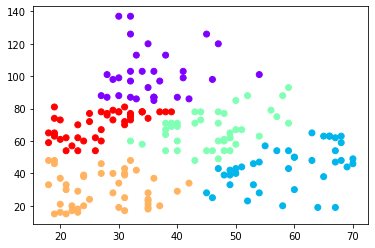

In [7]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(npCust)
plt.scatter(npCust[:,0],npCust[:,1], c=cluster.labels_, cmap='rainbow')